In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [46]:
def cvt_P(manom):
    return 0.2 * 9.81 * manom

In [47]:
sigma_spirt  = 22.78 * 1e-3
manom_error  = 1 # деление
r_prcs_error = 0.00005 # м
p_error      = cvt_P(manom_error) # Па
p_error

1.9620000000000002

Оценка диаметра иглы по формуле лапласа

In [48]:
# показания манометра при пробулькивании в спирте (открыт нижний кран)
manom_spirt = [42, 41]
p_spirt     = [0.2 * 9.81 * manom for manom in manom_spirt]
r_igla      = [2 * sigma_spirt / delta_p for delta_p in p_spirt]
sigma_r_igla = [2 * sigma_spirt / delta_p**2 * p_error for delta_p in p_spirt]
print(sigma_r_igla)
sigma_r_igla = np.sqrt(sigma_r_igla[0]**2 + sigma_r_igla[1]**2)
p_spirt, r_igla, sigma_r_igla, np.mean(r_igla), sigma_r_igla / np.mean(r_igla)

[1.3163947196275723e-05, 1.3813921983480296e-05]


([82.40400000000001, 80.44200000000001],
 [0.0005528857822435804, 0.0005663708013226921],
 1.9081770000500887e-05,
 0.0005596282917831362,
 0.034097221817897906)

In [49]:
r_igla = np.mean(r_igla)

Внутренний диаметр иглы по микроскопу


In [50]:
d_precise = 1.15 # мм
r_precise = d_precise / 2 * 0.001 # м
r_precise # м

0.000575

Погрузили иглу в воду (касается) и открыли аспиратор

*T = 23.1 C, расстояние h1 = 2 см*

In [51]:
h1 = 2 * 0.01                # м
manom_water   = [118, 117]   # показания манометра в момент пузырика

delta_p_water = [0.2 * 9.81 * manom for manom in manom_water] # P1 - перепад давлений в Па

P1 = np.mean(delta_p_water)
P1

230.53500000000003

Утопили иглу в воду

*T = 23.1 C, расстояние h2 = 0.75 см*

In [52]:
h2 = 0.75 * 0.01
manom_drown_water = [177, 174]

delta_p_drown_water = [0.2 * 9.81 * manom for manom in manom_drown_water] # P2
P2 = np.mean(delta_p_drown_water)
P2


344.331

In [53]:
(P2 - P1) / 1000 / 9.81

0.0116

In [54]:
extra_p = P2 - P1 # rho g h
extra_p_error = np.sqrt(p_error**2 + p_error**2)
extra_p, extra_p_error

(113.79599999999999, 2.7746870093760125)

$$\Delta P = P - \rho g h$$

*скорее всего не надо включать T = 23 в график т к мы открывали кран аспиратора и выставляли 0 в манометре*

In [55]:
Ts       = [23.1, 28, 32.8, 38.5, 43.7, 49.5, 54.5] # C
Ts       = [T + 273.15 for T in Ts] # C
Ts_error = [0.2 for T in Ts]
print(Ts)

[296.25, 301.15, 305.95, 311.65, 316.84999999999997, 322.65, 327.65]


In [56]:
manoms   = [np.mean([177, 174]),
            np.mean([171, 172]),
            np.mean([169, 170, 169]),
            np.mean([168, 168, 167]),
            np.mean([167, 167, 166]),
            np.mean([166, 165, 165]),
            np.mean([164, 164, 164])]

print(manoms)
ps       = [cvt_P(manom) for manom in manoms]
print(ps)
delta_ps = [p - extra_p for p in ps]
print(delta_ps)
delta_p_error = np.sqrt(p_error**2 + extra_p_error**2)
delta_ps, delta_p_error

[175.5, 171.5, 169.33333333333334, 167.66666666666666, 166.66666666666666, 165.33333333333334, 164.0]
[344.331, 336.483, 332.232, 328.962, 327.0, 324.38400000000007, 321.76800000000003]
[230.53500000000003, 222.687, 218.43600000000004, 215.166, 213.204, 210.58800000000008, 207.97200000000004]


([230.53500000000003,
  222.687,
  218.43600000000004,
  215.166,
  213.204,
  210.58800000000008,
  207.97200000000004],
 3.398283684450137)

In [57]:
# радиус иглы под микроскопом
# sigmas = [r_precise * p / 2 for p in delta_ps]
# sigma_errors = [np.sqrt((r_prcs_error * p / 2)**2 + (delta_p_error * r_precise / 2)**2) for p in delta_ps]
# sigmas, sigma_errors

sigmas = [r_igla * p / 2 for p in delta_ps]
print(sigmas)
sigma_errors = [np.sqrt((sigma_r_igla * p / 2)**2 + (delta_p_error * r_precise / 2)**2) for p in delta_ps]
print(sigma_errors)

[0.06450695412311266, 0.06231097270615563, 0.06112148277197058, 0.06020649051490514, 0.05965749516066589, 0.058925501355013565, 0.058193507549361215]
[0.0024067357400758167, 0.0023385035705999974, 0.0023017169827806625, 0.0022735069234904714, 0.0022566186546969097, 0.0022341463566666387, 0.0022117273864952157]


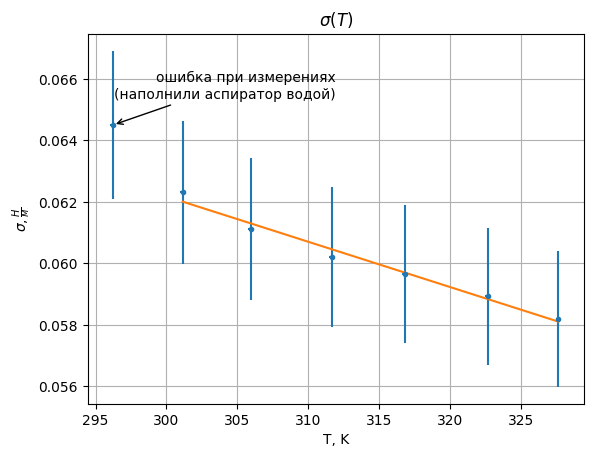

(-0.00014732782609602925, 1.0093558928599255e-05)

In [70]:
plt.title ('$\sigma(T)$')
plt.xlabel ('T, K')
plt.ylabel ('$\\sigma, \\frac{Н}{м}$')

plt.errorbar(x = Ts, y = sigmas, xerr = Ts_error, yerr = sigma_errors, marker='.', ls = "None")
plt.annotate('ошибка при измерениях\n(наполнили аспиратор водой)',
            xy=(Ts[0], sigmas[0]),
            xytext=(0.50, 0.9), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", facecolor='black'),
            horizontalalignment='right', verticalalignment='top')

k, b, kerr, berr = LeastSquares (Ts[1:], sigmas[1:])
x = np.array([min(Ts[1:]), max(Ts[1:])])
plt.plot(x, k * x + b)
plt.grid(visible=True)
plt.show()
k, kerr

In [59]:
dsigmadt = k
dsigmadt_err = kerr

Теплота образования пленки

In [66]:
qs = [-T * dsigmadt for T in Ts]

q_errors = [np.sqrt((Ts_error[i] * dsigmadt)**2 + (dsigmadt_err * Ts[i])**2) for i in range(len(Ts))]
eps_q = [q_errors[i] / qs[i] * 100 for i in range(len(qs))]
eps_q

[6.851420557855706,
 6.851409822200505,
 6.851399801797525,
 6.8513884986861076,
 6.851378714636369,
 6.851368354865969,
 6.851359862024404]

/tmp/ipykernel_6832/3048320456.py:15: RuntimeWarning: invalid value encountered in sqrt
  sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )


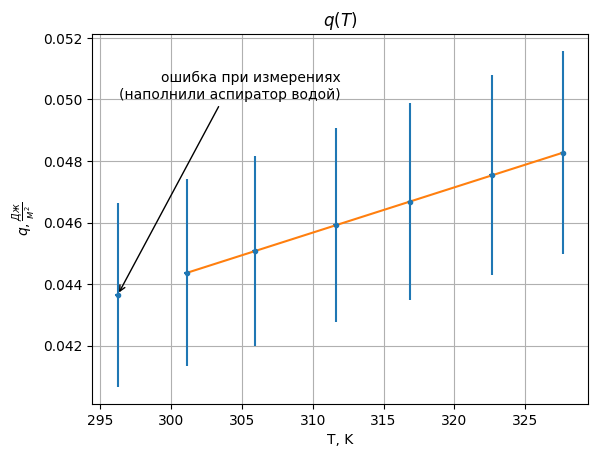

(0.00014732782609602925, nan)

In [61]:
plt.title ('$q(T)$')
plt.xlabel ('T, K')
plt.ylabel ('$q, \\frac{Дж}{м^2}$')

plt.errorbar(x = Ts, y = qs, xerr = Ts_error, yerr = q_errors, marker='.', ls = "None")
plt.annotate('ошибка при измерениях\n(наполнили аспиратор водой)',
            xy=(Ts[0], qs[0]),
            xytext=(0.50, 0.9), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", facecolor='black'),
            horizontalalignment='right', verticalalignment='top')

k, b, kerr, berr = LeastSquares (Ts[1:], qs[1:])
x = np.array([min(Ts[1:]), max(Ts[1:])])
plt.plot(x, k * x + b)
plt.grid(visible=True)
plt.show()
k, kerr

Поверхностая энергия на единицу площади

$$\frac{U}{F} = \sigma - T \frac{d\sigma}{dT}$$

In [62]:
U_F = [sigmas[i] - Ts[i]*dsigmadt for i in range (len(Ts))]
U_F_err = [np.sqrt(
    (sigma_errors[i])**2 +
    (dsigmadt_err * Ts[i])**2 +
    (Ts_error[i]*dsigmadt)**2
) for i in range (len(Ts))]

eps_U_F = [U_F_err[i] / U_F [i] * 100 for i in range (len(Ts))]
eps_U_F



[3.549211938890104,
 3.595133630012963,
 3.6269199549552287,
 3.657467062758344,
 3.6809366011121685,
 3.7097840387883183,
 3.737059433846346]

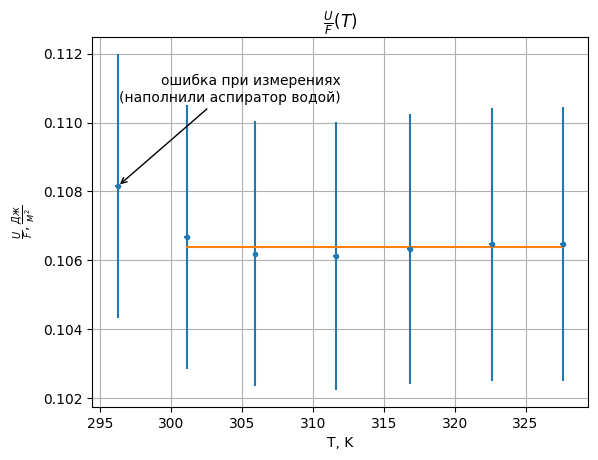

(0.0, 1.0093558928663253e-05)

In [72]:
plt.title ('$\\frac{U}{F} (T)$')
plt.xlabel ('T, K')
plt.ylabel ('$\\frac{U}{F}, \\frac{Дж}{м^2}$')

plt.errorbar(x = Ts, y = U_F, xerr = Ts_error, yerr = U_F_err, marker='.', ls = "None")
plt.annotate('ошибка при измерениях\n(наполнили аспиратор водой)',
            xy=(Ts[0], U_F[0]),
            xytext=(0.50, 0.9), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", facecolor='black'),
            horizontalalignment='right', verticalalignment='top')

k, b, kerr, berr = LeastSquares (Ts[1:], U_F[1:])
x = np.array([min(Ts[1:]), max(Ts[1:])])
plt.plot(x, k * x + b)
plt.grid(visible=True)
plt.show()
k, kerr

In [81]:
U_F_mean = np.mean (U_F[1:])
U_F_mean_err = np.sqrt((np.std (U_F) / np.sqrt (len (U_F) - 1))**2 + np.mean(U_F_err)**2)
U_F_mean, U_F_mean_err

(0.1063768328820956, 0.003901631057091565)

Tex 

\documentclass{article}
\usepackage{graphicx} % Required for inserting images

\title{2.5.1}

\usepackage[T2A]{fontenc}
\usepackage[utf8]{inputenc}
\usepackage[english, russian]{babel}
\usepackage{graphicx}%Вставка картинок правильная
\input{insbox}
\usepackage{blindtext}

\usepackage{float}%"Плавающие" картинки

\usepackage{wrapfig}

% Set page size and margins
% Replace `letterpaper' with `a4paper' for UK/EU standard size
\usepackage[letterpaper,top=2cm,bottom=2cm,left=3cm,right=3cm,marginparwidth=1.75cm]{geometry}

% Useful packages
\usepackage{amsmath}
\usepackage{graphicx}
\usepackage[colorlinks=true, allcolors=blue]{hyperref}

\author{Тихонов Ярослав Б01-306}
\date{Февраль 2024}
\title{\begin{center}Отчет о выполнении лабораторной работы 2.5.1\end{center}
\textbf{Измерение коэффициента поверхностного натяжения жидкости}}

\begin{document}

\maketitle
\section{Аннотация}
    \subsection{Цель}
   
    измерить температурную зависимость коэффициента поверхностного натяжения дистиллированной воды с использованием коэффициента поверхностного натяжения спирта;определить удельную полную поверхностную энергию и теплоту, необходимые для изотермического образования единицы поверхности жидкости при различной температуре

    \subsection{Оборудование}
    
    прибор Ребиндера, термостатом , микроманометром

\section{Ход работы}
    \subsection{Теоретические сведения}
   
    Наличие поверхностного слоя приводит к различию давлений по разные стороны от искривленной границы раздела двух сред. Для сферического пузырька с воздухом в идкости избыточное давление даётся формулой Лапласа(эта формула лежит в основе метода определения коэффициента поверхностного натяжения жидкости) :

\begin{equation}\label{1}
    \Delta P = P_\text{внутр} - P_\text{снар} = \frac{2 \sigma}{r}
\end{equation}

    где $\sigma$ - коэффициент поверхностного натяжения,  $r$ - радиус кривизны поверхности раздела двух сред

    \subsection{Экспериментальная установка}

    \begin{figure}
        \centering
        \includegraphics[width=0.5\linewidth]{ustanovka.png}
        \caption{экспериментальная установка}
        \label{fig:p1}
    \end{figure}
    
    На рис.\ref{fig:p1} представлена схема экспериментальной установки. Дистиллированная вода наливается в сосуд $B$; этиловый спирт наливается  в сосуд $E$.  При измерениях  колбы герметично закрываются  пробками.   Через одну из двух пробок  проходит полая металлическая игла ;этой пробкой закрывается сосуд, в котором  проводятся измерения. Верхний конец иглы открыт в атмосферу, а нижний погружен в жидкость. При создании достаточного  разряжения воздуха в колбе с иглой пузырьки воздуха начинают пробулькивать через жидкость. Поверхностное натяжение можно определить по величине разряжения $\Delta P$

    Разряжение в системе создается с помощью аспиратора $A$. В колбах $B$ и $C$, соединённых трубками с нижней полостью аспиратора,  создается пониженное давление. Разность давлений в полостях с разряженным воздухом и атмосферой измеряется спиртовым микроманометром. Для стабилизации температуры через рубашку $D$ колбы $B$ непрерывно прогоняется вода из термостата.

    Кончик иглы касается поверхности жидкости, чтобы исключить влияние гидростатического давления столба жидкости. Погрузив кончик трубки до самого дна, можно устранить погрешность, вносимую высокой теплопроводностью иглы, и погрешность, вызываемуютепловым расширениием. Тогда давление, измеренное микроманометром:

\begin{equation}\label{2}
    P = \Delta P + \rho g h
\end{equation}    
    
    $\rho g h$ от температуры практически не зависит, так как подъём уровня жидкости компенсируется уменьшением её плотности. Величина  $\rho g h$ измеряется двумя способами: сначала замеряется величина $P_1 = P'$( кончик трубки касается поверхности жидкости); затем при этой же температуре опускается игла до дна и замеряется $P_2 = \rho g h + \Delta P''$. Из-за несжимаемости  жидкости можно положить $P' = P''$ , тогда

\begin{equation}\label{3}
    \rho g h = P_2 - P_1
\end{equation}

\section{Обработка измерений}

Для перевода показаний микроманометра $N$ в Па, используем формулу
$$P = 0.2 * 9.81 * N$$

\subsection{Измерение радиуса иглы}
\textbf{1 способ} \\

Опустим иглу в спирт там чтобы ее кончик касался поверхности жидкости, после этого откроем аспиратор и запишем показания микроманометра в момент выхода пузырьков.

Из $\eqref{1}$:
$$r = \frac{2 \sigma_{\text{спирт}}}{P_1}$$

\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|}
    \hline
        $N$, дел & $P_1$, Па & $\sigma_P$, Па & $r$, мм & $\sigma_r$, мм\\ \hline
        42 & 82.40 & 1.96 & 0.55 & 0.01 \\ \hline
        41 & 80.44 & 1.96 & 0.57 & 0.01 \\ \hline
    \end{tabular}
\end{table}

$r = (0.56 \pm 0.02)$ мм ($\varepsilon = 3 \% $)\\

\textbf{2 способ} \\
Посмотрим на иглу под микроскопом.

$r = (0.58 \pm 0.05)$ мм ($\varepsilon = 9 \% $) \\

\begin{figure} \label{igla}
    \centering
    \includegraphics[width=0.5\linewidth]{igla.png}
    \caption{Игла под микроскопом}
\end{figure}

Видим, что первый способ оказался точнее.

\subsection{Вычисление $\rho g h$}
Помыв от спирта и высушив иглу, погрузим ее в колбу с водой так чтобы кончик касался ее поверхности. Повторим измерения из 3.1 измерим $P_1$.

Измерим $P_2$, опусив кончик иглы на дно колбы с водой и повторив измерения.
$$P_2 - P_1 = \rho g h$$
$P_2 = 344.31 \pm 1.96 $ Па \\
$P_1 = 230.54 \pm 1.96 $ Па \\
$\rho g h = 113.80 \pm 2.77$ Па

\subsection{Зависимость $\sigma(T)$}

$$\Delta P = P - \rho g h$$

Для каждого значения $T$ получали три давления и итоговое давление усредняли.

\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|c|c|}
    \hline
        $T$, K& $N$, дел & $P$, Па & $\Delta P$ & $\sigma$, $10^{-3}$ Н/м & $\Delta \sigma$, $10^{-3}$ Н/м & $\varepsilon, \%$ \\ \hline
        296.25 & 175.5 & 344.3 & 230.5 & 64.5 & 2.4 & 3.7 \\ \hline
        301.15 & 171.5 & 336.5 & 222.7 & 62.3 & 2.3 & 3.8 \\ \hline
        305.95 & 169.3 & 332.2 & 218.4 & 61.1 & 2.3 & 3.8 \\ \hline
        311.65 & 167.7 & 328.9 & 215.2 & 60.2 & 2.3 & 3.8 \\ \hline
        316.85 & 167.7 & 327 & 213.2 & 59.7 & 2.3 & 3.8 \\ \hline
        322.65 & 165.3 & 324.4 & 210.6 & 58.9 & 2.2 & 3.8 \\ \hline
        327.65 & 164 & 321.8 & 208.0 & 58.2 & 2.2 & 3.8 \\ \hline
    \end{tabular}
\end{table}

Первое значение при $T = 296.25 K$ мы убрали из рассмотрения т к после его измерения мы случайно наполнили аспиратор водой, вытеснив находившийся там воздух, вследствие чего поменялось давление в емкости с водой и иглой. 

\begin{figure} [H]
    \centering
    \includegraphics[width=0.8\linewidth]{graph.png}
\end{figure}

Угловой коэффициент прямой  $\frac{d \sigma}{d T} = (-0.147 \pm 0.010) ~10^{-3}$ Н/К 

\subsection{Вычисление $q(T)$ - теплоты образования пленки}

$$q(T) = - T \frac{d\sigma}{dT}$$

\begin{figure}[H]
    \centering
    \includegraphics[width=0.8\linewidth]{qgraph1.png}
    
    \label{fig:enter-label}
\end{figure}

\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
    \hline
        $T$, K& $q$, мДж/м$^2$ & $\Delta q$, мДж/м$^2$ & $\varepsilon$, $\%$ \\ \hline
        296.25 & 43.6 & 3.0 & 6.9  \\ \hline
        301.15 & 44.4 & 3.0 & 6.9  \\ \hline
        305.95 & 45.1 & 3.1 & 6.9  \\ \hline
        311.65 & 45.9 & 3.1 & 6.9  \\ \hline
        316.85 & 46.7 & 3.2 & 6.9  \\ \hline
        322.65 & 47.5 & 3.3 & 6.9 \\ \hline
        327.65 & 48.3 & 3.3 & 6.9 \\ \hline
    \end{tabular}
\end{table}

\subsection{Вычисление $\frac{U}{F}(T)$ - удельной полной поверхностной энергии}

\begin{figure} [H]
    \centering
    \includegraphics[width=0.8\linewidth]{UF_graph.png}
    
    \label{fig:enter-label}
\end{figure}

\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
    \hline
        $T$, K& $\frac{U}{F}$, мДж/м$^2$ & $\Delta \frac{U}{F}$, мДж/м$^2$ & $\varepsilon$, $\%$ \\ \hline
        296.25 & 108.2 & 3.8 & 3.5  \\ \hline
        301.15 & 106.7 & 3.8 & 3.6  \\ \hline
        305.95 & 106.2 & 3.9 & 3.6  \\ \hline
        311.65 & 106.1 & 3.9 & 3.7  \\ \hline
        316.85 & 106.3 & 3.9 & 3.7  \\ \hline
        322.65 & 106.5 & 3.9 & 3.7 \\ \hline
        327.65 & 106.5 & 4.0 & 3.7 \\ \hline
    \end{tabular}
\end{table}


\section{Вывод}
В ходе работы: \\
- была измерена температурная зависимость коэффициента поверхностного натяжения дистиллированной воды с использованием коэффициента поверхностного натяжения спирта \\
\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
    \hline
        $T$, K& $\sigma$, $10^{-3}$ Н/м & $\Delta \sigma$, $10^{-3}$ Н/м & $\varepsilon, \%$ \\ \hline
        296.25 &  64.5 & 2.4 & 3.7 \\ \hline
        301.15 &  62.3 & 2.3 & 3.8 \\ \hline
        305.95 &  61.1 & 2.3 & 3.8 \\ \hline
        311.65 &  60.2 & 2.3 & 3.8 \\ \hline
        316.85 &  59.7 & 2.3 & 3.8 \\ \hline
        322.65 &  58.9 & 2.2 & 3.8 \\ \hline
        327.65 &  58.2 & 2.2 & 3.8 \\ \hline
    \end{tabular}
\end{table}

- определили теплоту, необходимую для изотермического образования единицы поверхности жидкости при различной температуре \\

\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
    \hline
        $T$, K& $q$, мДж/м$^2$ & $\Delta q$, мДж/м$^2$ & $\varepsilon$, $\%$ \\ \hline
        296.25 & 43.6 & 3.0 & 6.9  \\ \hline
        301.15 & 44.4 & 3.0 & 6.9  \\ \hline
        305.95 & 45.1 & 3.1 & 6.9  \\ \hline
        311.65 & 45.9 & 3.1 & 6.9  \\ \hline
        316.85 & 46.7 & 3.2 & 6.9  \\ \hline
        322.65 & 47.5 & 3.3 & 6.9 \\ \hline
        327.65 & 48.3 & 3.3 & 6.9 \\ \hline
    \end{tabular}
\end{table}

- определили удельную полную поверхностную энергию \\
$$\frac{U}{F} = (106.38 \pm 3.90) ~\text{мДж/м}^2 $$ 
не зависит от температуры


\end{document}